# Exploring the Heliosphere with Python

This notebook demonstrates loading and plotting science data in the Heliosphere using PySPEDAS and SunPy. It includes simple examples from 17 missions, as well as data from ground magnetometers and geomagnetic indices.

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences/Institute of Geophysics and Planetary Physics**

egrimes(at)igpp.ucla.edu

Last updated: January 20, 2023

Notes:
- I tried to start with the Sun, and go all the way to the ground; so solar data are first and ground data are last (with a short detour to Mars)
- For the most part, the data shown are from March 27, 2017; exceptions are Parker Solar Probe and Solar Orbiter (which had not launched yet, so more recent examples are used).
- Only a few data products are loaded/plotted for each spacecraft in this notebook, so not all spacecraft/instruments/data products are demonstrated. For a list of the full capabilities, please see the documentation:

PySPEDAS: https://pyspedas.readthedocs.io/

SunPy: https://sunpy.org/

- The SunPy examples were taken from the SunPy examples gallery, with minor changes for our event
- Other Python in Heliophysics Community (PyHC) projects used in this notebook:

cdflib: https://cdflib.readthedocs.io/

PyTplot: https://pytplot.readthedocs.io/

Geopack: https://github.com/tsssss/geopack

HAPI client: https://github.com/hapi-server/client-python

>[Exploring the Heliosphere with Python](#scrollTo=7of2f7In4ju9)

>>[Solar and Heliospheric Observatory satellite (SOHO)](#scrollTo=63VP0tdm7sr5)

>>[Solar Dynamics Observatory (SDO)](#scrollTo=LBbTEsRU8iJP)

>>[Parker Solar Probe](#scrollTo=YI5IRRJTIgoh)

>>[Solar Orbiter](#scrollTo=dOmstkoqI6G0)

>>[Advanced Composition Explorer (ACE)](#scrollTo=repQs8PglYkK)

>>[Deep Space Climate Observatory (DSCOVR)](#scrollTo=uNUdKsUhkzL7)

>>[Solar Terrestrial Relations Observatory (STEREO)](#scrollTo=r-7y4swZcPan)

>>[Mars Atmosphere and Volatile Evolution (MAVEN)](#scrollTo=GsHDJoLzlzlc)

>>[OMNI](#scrollTo=P8o9_s4NlpUJ)

>>[Kyoto Dst](#scrollTo=kvwReQcYoTga)

>>[Geotail](#scrollTo=3aKOINyJbquI)

>>[Magnetospheric Multiscale (MMS)](#scrollTo=KCUfQYIElyri)

>>[Cluster](#scrollTo=EcsRGbTs3Mfd)

>>[Time History of Events and Macroscale Interactions during Substorms (THEMIS)](#scrollTo=Fz40PKL4cGQF)

>>[Van Allen Probes (formerly RBSP)](#scrollTo=DDlc_B52b5Sf)

>>[Arase](#scrollTo=5mR0VVLcmQtv)

>>[Geopack (Tsyganenko field models)](#scrollTo=hgmYsl5IzQ7N)

>>[Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)](#scrollTo=PAY8dDZImU1N)

>>[Polar Operational Environmental Satellites (POES)](#scrollTo=nWCmey5BmYRu)

>>[Swarm](#scrollTo=85RU5QRK4CKY)

>>[Spherical Elementary Currents (SECS)](#scrollTo=IwQmONDMn14b)

>>[Equivalent Ionospheric Currents (EICS)](#scrollTo=WyuIzxA_oEDq)

>>[All Sky Imager data](#scrollTo=cS5ZJ8DQocJQ)

>>[Ground magnetometer data](#scrollTo=YupmshpcoX-l)

>>[Magnetic Induction Coil Array (MICA)](#scrollTo=BeVmdYo4oe5U)

>>[Resources](#scrollTo=CJRw4BVBMVIP)

>>>[PyTplot Basics](#scrollTo=CJRw4BVBMVIP)

>>>[Loading Data](#scrollTo=CJRw4BVBMVIP)

>>>[Plotting Data](#scrollTo=CJRw4BVBMVIP)

>>>[Dates and Times](#scrollTo=CJRw4BVBMVIP)

>>>[Coordinate Transformations](#scrollTo=CJRw4BVBMVIP)

>>>[Analysis](#scrollTo=CJRw4BVBMVIP)

>>>[Documentation](#scrollTo=CJRw4BVBMVIP)



In [ ]:
!pip install pyspedas

In [ ]:
!pip install sunpy
!pip install zeep # required by SunPy
!pip install drms # also required by SunPy

Restart the session:

In [ ]:
exit()

In [ ]:
trange = ['2017-03-27', '2017-03-28']

## Solar and Heliospheric Observatory satellite (SOHO) <a class="anchor" id="soho"></a>

The joint NASA-ESA [Solar & Heliospheric Observatory](https://www.nasa.gov/mission_pages/soho/index.html) mission -- SOHO -- was designed to study the Sun inside out, from its internal structure, to the extensive outer atmosphere, to the solar wind that it blows across the solar system. 


Create a figure of LASCO C2 data

In [ ]:
import os

import matplotlib.pyplot as plt

import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

timerange = a.Time('2017/03/27 06:00', '2017/03/27 06:01')
instrument = a.Instrument.lasco
detector = a.Detector.c2
result = Fido.search(timerange, instrument, detector)
downloaded_files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

22630019.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

In [ ]:
lascomap = sunpy.map.Map(downloaded_files[0])
fig = plt.figure()
lascomap.plot()

plt.show()

 [astropy.io.fits.verify]

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs
 [sunpy.map.mapbase]
For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs



INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


Load the CELIAS data

In [ ]:
import pyspedas

pyspedas.soho.celias(trange=['2017-03-27', '2017-03-28'])

20-Jan-23 01:35:24: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/celias/pm_5min/2017/
20-Jan-23 01:35:24: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/celias/pm_5min/2017/soho_celias-pm_5min_20170327_v02.cdf to soho_data/celias/pm_5min/2017/soho_celias-pm_5min_20170327_v02.cdf
20-Jan-23 01:35:25: Download complete: soho_data/celias/pm_5min/2017/soho_celias-pm_5min_20170327_v02.cdf


['V_p',
 'N_p',
 'Vth_p',
 'NS_angle',
 'V_He',
 'CRN',
 'GSE_POS',
 'HC_RANGE',
 'HG_LAT',
 'HG_LONG']

Plot the proton velocity, density and SOHO spacecaft position in GSE coordinates, as a function of time:



In [ ]:
from pytplot import tplot

tplot(['V_p', 'N_p', 'GSE_POS'])

Load the COSTEP data:

In [ ]:
pyspedas.soho.costep(trange=['2017-03-27', '2017-03-28'], time_clip=True, datatype='ephin_l3i-1min')

20-Jan-23 01:35:25: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/costep/ephin_l3i-1min/2017/
20-Jan-23 01:35:26: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/costep/ephin_l3i-1min/2017/soho_costep-ephin_l3i-1min_20170101_v01.01.cdf to soho_data/costep/ephin_l3i-1min/2017/soho_costep-ephin_l3i-1min_20170101_v01.01.cdf
20-Jan-23 01:35:28: Download complete: soho_data/costep/ephin_l3i-1min/2017/soho_costep-ephin_l3i-1min_20170101_v01.01.cdf
20-Jan-23 01:35:49: Time clip was applied to: status
20-Jan-23 01:35:49: Time clip was applied to: accum_time
20-Jan-23 01:35:49: Time clip was applied to: P_int
20-Jan-23 01:35:50: Time clip was applied to: P_sys
20-Jan-23 01:35:50: Time clip was applied to: P_stat
20-Jan-23 01:35:50: Time clip was applied to: He_int
20-Jan-23 01:35:50: Time clip was applied to: He_sys
20-Jan-23 01:35:51: Time clip was applied to: He_stat


['status',
 'accum_time',
 'P_int',
 'P_sys',
 'P_stat',
 'He_int',
 'He_sys',
 'He_stat']

Plot the COSTEP proton intensity:

In [ ]:
tplot('P_int')

In [ ]:
pyspedas.soho.erne(trange=trange)

20-Jan-23 13:35:04: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2017/
20-Jan-23 13:35:05: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2017/soho_erne-hed_l2-1min_20170327_v01.cdf to soho_data/erne/hed_l2-1min/2017/soho_erne-hed_l2-1min_20170327_v01.cdf
20-Jan-23 13:35:05: Download complete: soho_data/erne/hed_l2-1min/2017/soho_erne-hed_l2-1min_20170327_v01.cdf


['est', 'PH', 'AH', 'PHC', 'AHC']

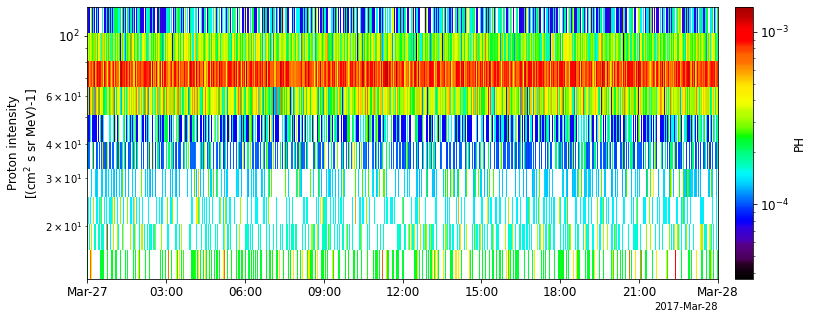

In [ ]:
options('PH', 'spec', True)
options('PH', 'ylog', True)
options('PH', 'zlog', True)

tplot(['PH'])

## Solar Dynamics Observatory (SDO) <a class="anchor" id="sdo"></a>

The [Solar Dynamics Observatory (SDO)](https://sdo.gsfc.nasa.gov/mission/) is designed to help us understand the Sun's influence on Earth and Near-Earth space by studying the solar atmosphere on small scales of space and time and in many wavelengths simultaneously.

Create an HMI magnetogram

In [ ]:
result = Fido.search(a.Time('2017/03/27 06:00', '2017/03/27 06:01'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
downloaded_file = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi_m_45s_2017_03_27_06_01_30_tai_magnetogram.fits:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

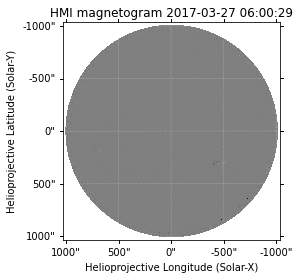

In [ ]:
hmi_map = sunpy.map.Map(downloaded_file[0])
fig = plt.figure()
hmi_map.plot()

plt.show()

Create an image from Atmospheric Imaging Assembly (AIA)

In [ ]:
t0 = astropy.time.Time('2017-03-27T06:00:01', scale='utc', format='isot')
q = Fido.search(
    a.Instrument.aia,
    a.Physobs.intensity,
    a.Wavelength(171*u.angstrom),
    a.Time(t0, t0 + 13*u.s),
)
m = sunpy.map.Map(Fido.fetch(q))

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_171a_2017_03_27t06_00_09_35z_image_lev1.fits:   0%|          | 0.00/11.6M [00:00<?, ?B/s]

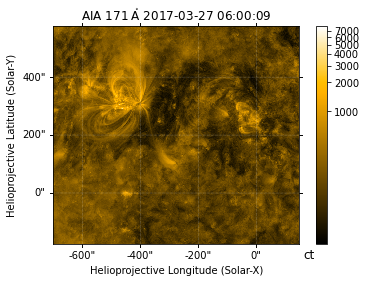

In [ ]:
m_cutout = m.submap(
    SkyCoord(-700*u.arcsec, -175*u.arcsec, frame=m.coordinate_frame),
    top_right=SkyCoord(150*u.arcsec, 575*u.arcsec, frame=m.coordinate_frame),
)
m_cutout.peek()

## Parker Solar Probe

NASA's [Parker Solar Probe](https://www.nasa.gov/content/goddard/parker-solar-probe-humanity-s-first-visit-to-a-star) mission is revolutionizing our understanding of the Sun, where changing conditions can propagate out into the solar system, affecting Earth and other worlds. Parker Solar Probe travels through the Sun’s atmosphere, closer to the surface than any spacecraft before it, facing brutal heat and radiation conditions to provide humanity with the closest-ever observations of a star.

Load and plot PSP FIELDS data (note: this example came from the team's IDL crib sheet):

In [ ]:
time_range = ['2019-04-03', '2019-04-03/12:00']

pyspedas.psp.fields(datatype='mag_rtn_4_sa_per_cyc',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_hfr',
                    varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)
pyspedas.psp.fields(datatype='rfs_lfr',
                    varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)

20-Jan-23 01:36:26: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
20-Jan-23 01:36:26: Downloading https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf to psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
20-Jan-23 01:36:27: Download complete: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
20-Jan-23 01:36:29: Time clip was applied to: psp_fld_l2_mag_RTN_4_Sa_per_Cyc
20-Jan-23 01:36:29: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
20-Jan-23 01:36:30: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
20-Jan-23 01:36:30: Time clip was applied to: psp_fld_l2_quality_flags
20-Jan-23 01:36:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/

['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'psp_fld_l2_quality_flags']

In [ ]:
from pytplot import tplot, options

options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'zlog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'zlog', True)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'], ysize=12)

## Solar Orbiter

[Solar Orbiter](https://www.nasa.gov/content/solar-orbiter-science) is a space mission of international collaboration between ESA and NASA to study the Sun, its outer atmosphere and what drives the constant outflow of solar wind that affects Earth. 

In [ ]:
pyspedas.solo.mag(trange=['2020-07-22', '2020-07-23'])


20-Jan-23 14:17:51: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/
20-Jan-23 14:17:52: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200722_v03.cdf to solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200722_v03.cdf
20-Jan-23 14:17:53: Download complete: solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200722_v03.cdf


['B_RTN']

In [ ]:
pyspedas.solo.swa(trange=['2020-07-22', '2020-07-23'], datatype='pas-eflux')

20-Jan-23 14:18:19: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/swa/science/l2/pas-eflux/2020/
20-Jan-23 14:18:20: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/swa/science/l2/pas-eflux/2020/solo_l2_swa-pas-eflux_20200722_v02.cdf to solar_orbiter_data/swa/science/l2/pas-eflux/2020/solo_l2_swa-pas-eflux_20200722_v02.cdf
20-Jan-23 14:18:21: Download complete: solar_orbiter_data/swa/science/l2/pas-eflux/2020/solo_l2_swa-pas-eflux_20200722_v02.cdf


['unrecovered_count', 'total_count', 'quality_factor', 'eflux']

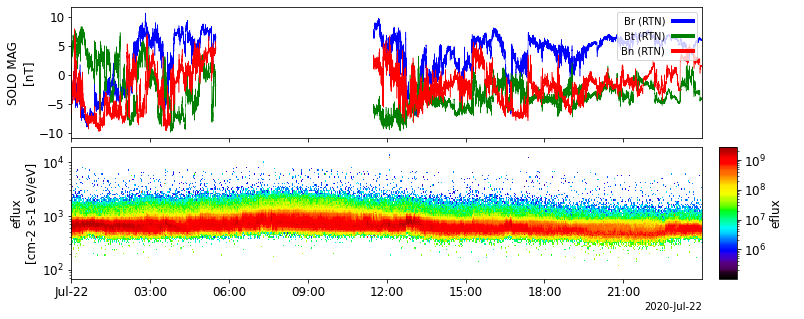

In [ ]:
tplot(['B_RTN', 'eflux'])

## Advanced Composition Explorer (ACE)

The [Advanced Composition Explorer](https://www.nasa.gov/ace), or ACE, observes and measures magnetic fields and particles in space, from a vantage point approximately 1/100 of the distance from Earth to the Sun.

In [ ]:
mfi_vars = pyspedas.ace.mfi(trange=trange)
swe_vars = pyspedas.ace.swe(trange=trange)

20-Jan-23 01:36:41: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/
20-Jan-23 01:36:43: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf to ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf
20-Jan-23 01:36:43: Download complete: ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf
20-Jan-23 01:36:47: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/
20-Jan-23 01:36:48: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf to ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf
20-Jan-23 01:36:48: Download complete: ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf


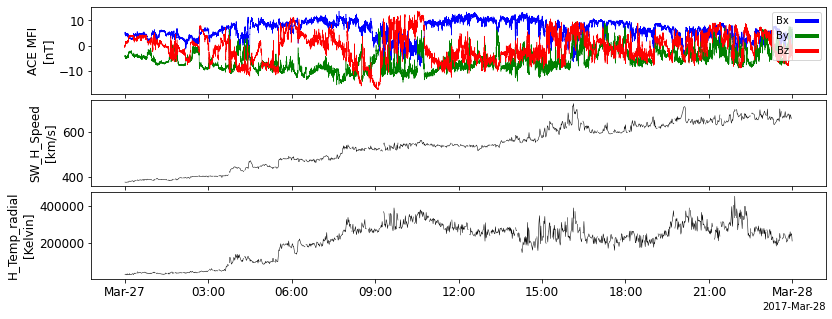

In [ ]:
tplot(['BGSEc', 'Vp', 'Tpr'])

## Deep Space Climate Observatory (DSCOVR)

The [Deep Space Climate Observatory](https://www.nesdis.noaa.gov/current-satellite-missions/currently-flying/dscovr-deep-space-climate-observatory), or DSCOVR, was launched in February of 2015, and maintains the nation's real-time solar wind monitoring capabilities, which are critical to the accuracy and lead time of NOAA's space weather alerts and forecasts. 

In [ ]:
mag_vars = pyspedas.dscovr.mag(trange=trange)
orb_vars = pyspedas.dscovr.orb(trange=trange)

20-Jan-23 01:36:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/
20-Jan-23 01:36:49: Downloading https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf to dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf
20-Jan-23 01:36:50: Download complete: dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf
20-Jan-23 01:36:54: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/orbit/pre_or/2017/
20-Jan-23 01:36:55: Downloading https://spdf.gsfc.nasa.gov/pub/data/dscovr/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf to dscovr_data/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf
20-Jan-23 01:36:55: Download complete: dscovr_data/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf


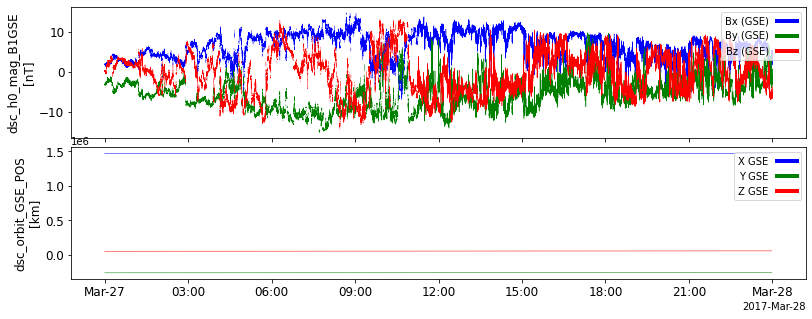

In [ ]:
tplot(['dsc_h0_mag_B1GSE', 'dsc_orbit_GSE_POS'])

## Solar Terrestrial Relations Observatory (STEREO)

The [Solar TErrestrial RElations Observatory](https://www.nasa.gov/directorates/heo/scan/services/missions/solarsystem/STEREO.html) (STEREO) consists of two nearly identical spacecraft that seek to establish a one-to-one cause and effect relationship between coronal mass ejections as seen at the sun, the acceleration of particles in interplanetary space, and terrestrial consequences.

In [ ]:
mag_vars = pyspedas.stereo.mag(trange=trange)
plastic_vars = pyspedas.stereo.plastic(trange=trange)

20-Jan-23 01:36:55: Downloading remote index: http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/
20-Jan-23 01:36:56: Downloading http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf to stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf
20-Jan-23 01:36:58: Download complete: stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf
20-Jan-23 01:37:27: Downloading remote index: http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/
20-Jan-23 01:37:29: Downloading http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf to stereo_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf
20-Jan-23 01:37:29: Download complete: stereo_data/plasti

The lengths of x and y do not match!
proton_n_s_flow_angle_HERTN is currently not in pytplot.
proton_n_s_flow_angle_HERTN is currently not in pytplot.
proton_n_s_flow_angle_HERTN is currently not in pytplot.


In [ ]:
tplot(['BFIELD', 'proton_number_density', 'proton_bulk_speed', 'proton_temperature'])

## Mars Atmosphere and Volatile Evolution (MAVEN)

The [Mars Atmosphere and Volatile EvolutioN](https://www.nasa.gov/mission_pages/maven/overview/index.html) (MAVEN) mission is part of NASA's Mars Scout program. Launched in Nov. 2013, the mission explores the Red Planet’s upper atmosphere, ionosphere and interactions with the sun and solar wind.

In [ ]:
mag_vars = pyspedas.maven.mag(trange=trange, spdf=True)
swe_vars = pyspedas.maven.swea(trange=trange, spdf=True)
swi_vars = pyspedas.maven.swia(trange=trange, spdf=True)

20-Jan-23 01:37:30: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/mag/l2/sunstate-1sec/cdfs/2017/03/
20-Jan-23 01:37:30: Downloading https://spdf.gsfc.nasa.gov/pub/data/maven/mag/l2/sunstate-1sec/cdfs/2017/03/mvn_mag_l2-sunstate-1sec_20170327_v01_r01.cdf to maven/mag/l2/sunstate-1sec/cdfs/2017/03/mvn_mag_l2-sunstate-1sec_20170327_v01_r01.cdf
20-Jan-23 01:37:31: Download complete: maven/mag/l2/sunstate-1sec/cdfs/2017/03/mvn_mag_l2-sunstate-1sec_20170327_v01_r01.cdf
20-Jan-23 01:37:31: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/swea/l2/svyspec/2017/03/
20-Jan-23 01:37:32: Downloading https://spdf.gsfc.nasa.gov/pub/data/maven/swea/l2/svyspec/2017/03/mvn_swe_l2_svyspec_20170327_v04_r05.cdf to maven/swea/l2/svyspec/2017/03/mvn_swe_l2_svyspec_20170327_v04_r05.cdf
20-Jan-23 01:37:34: Download complete: maven/swea/l2/svyspec/2017/03/mvn_swe_l2_svyspec_20170327_v04_r05.cdf
20-Jan-23 01:37:34: Downloading remote index: https://spdf.gsfc.nasa.gov/pub

In [ ]:
swi_vars

['spectra_diff_en_fluxes']

In [ ]:
options('spectra_diff_en_fluxes', 'ylog', True)
options('spectra_diff_en_fluxes', 'zlog', True)
options('diff_en_fluxes', 'ylog', True)
options('diff_en_fluxes', 'zlog', True)
options('diff_en_fluxes', 'spec', True)

tplot(['OB_B', 'diff_en_fluxes', 'spectra_diff_en_fluxes'], ysize=10)

## OMNI 

Solar wind [magnetic field and plasma data](https://omniweb.gsfc.nasa.gov/index.html) at Earth's Bow Shock Nose (BSN), also geomagnetic activity indices and energetic proton fluxes.

In [ ]:
omni_vars = pyspedas.omni.data(trange=['2017-03-01', '2017-04-01'], time_clip=False)

20-Jan-23 01:37:36: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/
20-Jan-23 01:37:36: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf to omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf
20-Jan-23 01:37:37: Download complete: omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf


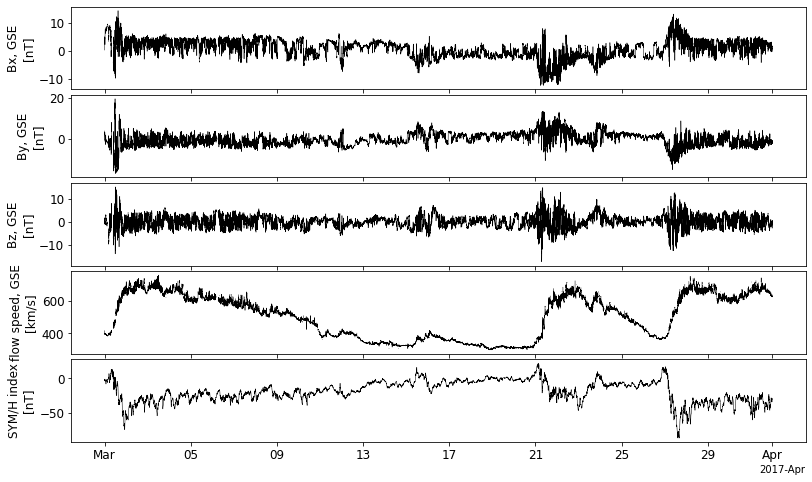

In [ ]:
tplot(['BX_GSE', 'BY_GSE', 'BZ_GSE', 'flow_speed', 'SYM_H'])

## Kyoto Dst

The hourly Dst index, from the [WDC for Geomagnetism](https://wdc.kugi.kyoto-u.ac.jp/dstdir/), Kyoto, Japan; useful indicator of geomagnetic storm intensity

In [ ]:
dst_vars = pyspedas.kyoto.dst(trange=['2017-03-01', '2017-04-01'])

20-Jan-23 01:37:44: Time clip returns full data set.
20-Jan-23 01:37:44: **************************************************************************************
20-Jan-23 01:37:44: The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
20-Jan-23 01:37:44:  are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
20-Jan-23 01:37:44:  the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
20-Jan-23 01:37:44:  [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
20-Jan-23 01:37:44:  make the Dst index available.
20-Jan-23 01:37:44: **************************************************************************************


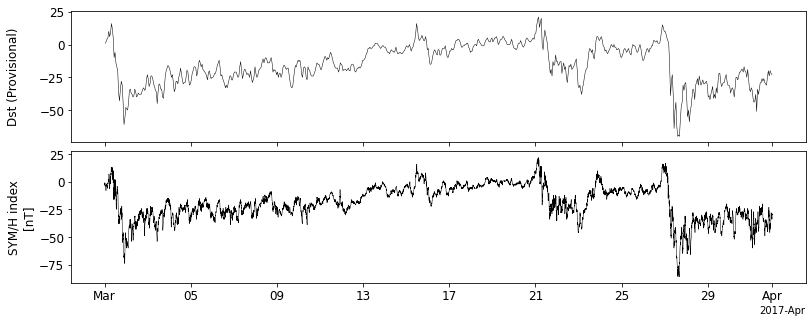

In [ ]:
tplot(['kyoto_dst', 'SYM_H'])

## Geotail

The [Geotail](https://solarsystem.nasa.gov/missions/geotail/in-depth/) mission was a joint project of Japan’s Institute of Space and Astronautical Science (ISAS) and later, from 2003, the Japan Aerospace Exploration Agency (JAXA) and NASA. 


Geotail’s goal was to study the structure and dynamics of the long tail region of Earth’s magnetosphere, which is created on the nightside of Earth by the solar wind. During active periods, the tail couples with the near-Earth magnetosphere, and often releases energy that is stored in the tail, activating auroras in the polar ionosphere.

In [ ]:
mgf_vars = pyspedas.geotail.mgf(trange=trange)
cpi_vars = pyspedas.geotail.cpi(trange=trange)

20-Jan-23 01:37:44: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/
20-Jan-23 01:37:45: Downloading https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf to geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf
20-Jan-23 01:37:45: Download complete: geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf
20-Jan-23 01:37:45: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/
20-Jan-23 01:37:46: Downloading https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf to geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf
20-Jan-23 01:37:46: Download complete: geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf


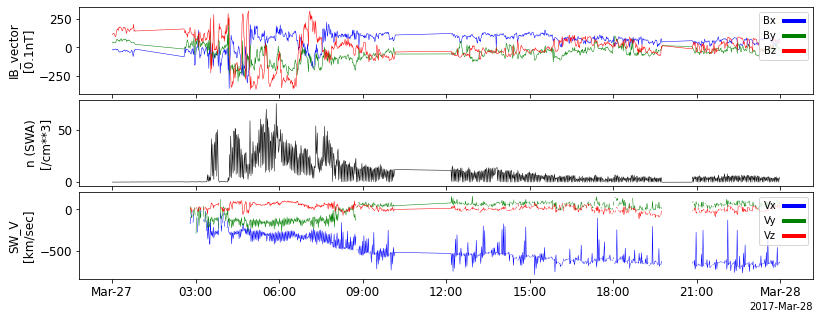

In [ ]:
tplot(['IB_vector', 'SW_P_Den', 'SW_V'])

## Magnetospheric Multiscale (MMS)

The [Magnetospheric Multiscale](https://mms.gsfc.nasa.gov/) (MMS) mission studies the mystery of how magnetic fields around Earth connect and disconnect, explosively releasing energy via a process known a magnetic reconnection.

In [ ]:
mec_vars = pyspedas.mms.mec(trange=trange)
fgm_vars = pyspedas.mms.fgm(trange=trange)
feeps_vars = pyspedas.mms.feeps(trange=trange)

SDC username (blank for public access): 


20-Jan-23 01:37:52: /usr/local/lib/python3.8/dist-packages/pyspedas/mms/mms_login_lasp.py:71: ResourceWarning: unclosed file <_io.BufferedWriter name='/root/mms_auth_info.pkl'>
  saved_auth = pickle.dump({'user': user, 'passwd': passwd}, open(os.sep.join([homedir, 'mms_auth_info.pkl']), 'wb'))

20-Jan-23 01:37:53: Downloading mms1_mec_srvy_l2_epht89q_20170327_v2.0.3.cdf to pydata/mms1/mec/srvy/l2/epht89q/2017/03
20-Jan-23 01:37:56: Loaded variables:
20-Jan-23 01:37:56: mms1_mec_dipole_tilt
20-Jan-23 01:37:56: mms1_mec_gmst
20-Jan-23 01:37:56: mms1_mec_mlat
20-Jan-23 01:37:56: mms1_mec_mlt
20-Jan-23 01:37:56: mms1_mec_l_dipole
20-Jan-23 01:37:56: mms1_mec_quat_eci_to_bcs
20-Jan-23 01:37:56: mms1_mec_quat_eci_to_dbcs
20-Jan-23 01:37:56: mms1_mec_quat_eci_to_dmpa
20-Jan-23 01:37:56: mms1_mec_quat_eci_to_smpa
20-Jan-23 01:37:56: mms1_mec_quat_eci_to_dsl
20-Jan-23 01:37:56: mms1_mec_quat_eci_to_ssl
20-Jan-23 01:37:56: mms1_mec_L_vec
20-Jan-23 01:37:56: mms1_mec_Z_vec
20-Jan-23 01:37:56: mms

The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_1 is currently not in pytplot.
The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_2 is currently not in pytplot.
The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_3 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_3 is currently not in pytplot.
mms1_epd_feeps_srvy_l2_electron_top_energy_centroid_sensorid_3 is currently not in pytplot.
The lengths of x and y do not match!
mms1_epd_feeps_srvy_l2_e

20-Jan-23 01:38:47: Loaded variables:
20-Jan-23 01:38:47: epoch
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_spinsectnum
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_1
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_2
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_3
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_4
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_5
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_9
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_10
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_11
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_12
20-Jan-23 01:38:47: mms1_epd_feeps_srvy_l2_electron_bottom_quality_indicator_sensorid_1
20-Jan-23 01:38:

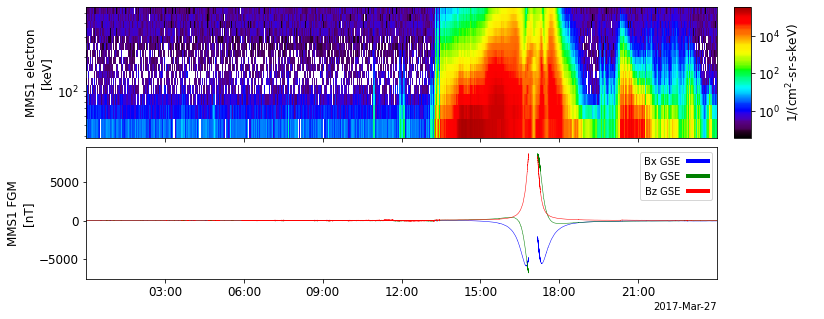

In [ ]:
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'])

20-Jan-23 01:58:48: Loading pydata/mms1/hpca/srvy/l2/ion/2017/03/mms1_hpca_srvy_l2_ion_20170327060000_v4.1.0.cdf
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_azimuth_decimation_factor
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_polar_decimation_factor
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_energy_decimation_factor
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_sweep_table_number
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_start_azimuth
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_science_mode
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_hplus_flux
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_hplus_phase_space_density
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_heplus_flux
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_heplus_phase_space_density
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_heplusplus_flux
20-Jan-23 01:58:52: Time clip was applied to: mms1_hpca_he

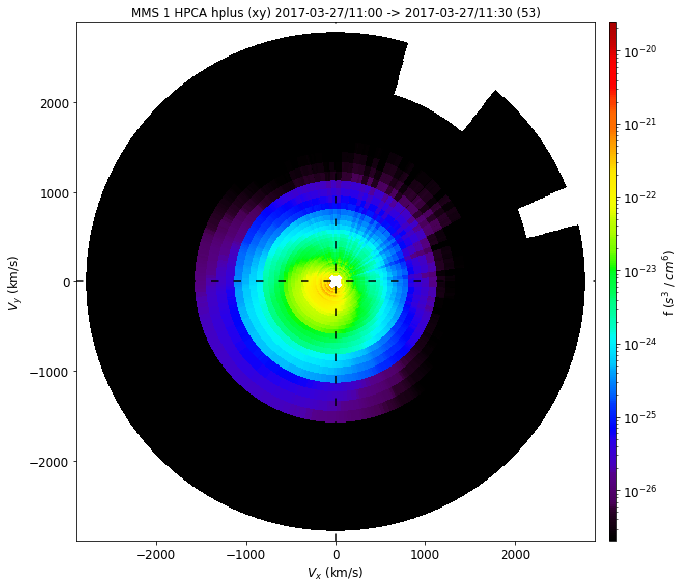

In [ ]:
from pyspedas.mms.particles.mms_part_slice2d import mms_part_slice2d

mms_part_slice2d(trange=['2017-03-27/11:00', '2017-03-27/11:30'], instrument='hpca', species='hplus')

## Cluster

Studying how the solar wind affects Earth, [Cluster](https://www.esa.int/Science_Exploration/Space_Science/Cluster_overview2) spacecraft pass in and out of our planet's magnetic field to make a detailed investigation of how the Sun and Earth interact.

In [ ]:
cl_vars = pyspedas.cluster.fgm(trange=trange, probe=['1', '2', '3', '4'])

20-Jan-23 01:49:37: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c1/up/fgm/2017/
20-Jan-23 01:49:38: File is current: cluster_data/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf
20-Jan-23 01:49:38: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c2/up/fgm/2017/
20-Jan-23 01:49:39: Downloading https://spdf.gsfc.nasa.gov/pub/data/cluster/c2/up/fgm/2017/c2_up_fgm_20170327_v02.cdf to cluster_data/c2/up/fgm/2017/c2_up_fgm_20170327_v02.cdf
20-Jan-23 01:49:39: Download complete: cluster_data/c2/up/fgm/2017/c2_up_fgm_20170327_v02.cdf
20-Jan-23 01:49:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c3/up/fgm/2017/
20-Jan-23 01:49:40: Downloading https://spdf.gsfc.nasa.gov/pub/data/cluster/c3/up/fgm/2017/c3_up_fgm_20170327_v02.cdf to cluster_data/c3/up/fgm/2017/c3_up_fgm_20170327_v02.cdf
20-Jan-23 01:49:41: Download complete: cluster_data/c3/up/fgm/2017/c3_up_fgm_20170327_v02.cdf
20-Jan-23 01:49:41: Downloading remote index: http

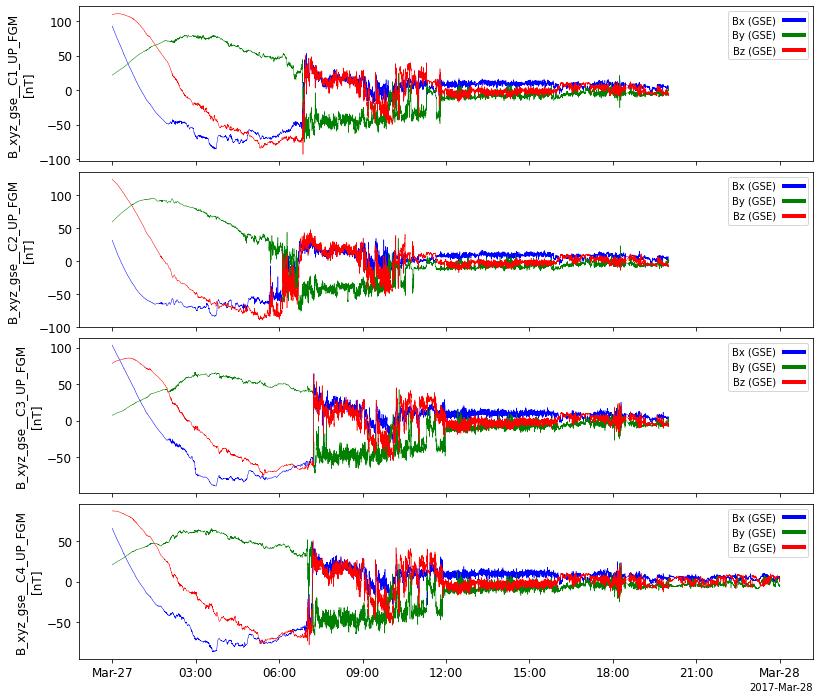

In [ ]:
tplot('B_xyz_gse__C?_UP_FGM', ysize=12)

## Time History of Events and Macroscale Interactions during Substorms (THEMIS)

The [Time History of Events and Macroscale Interactions during Substorms](https://www.nasa.gov/mission_pages/themis/mission/index.html) —THEMIS — mission studies how mass and energy move through the near-Earth environment in order to determine the physical processes initiating auroras.

In [ ]:
sta_vars = pyspedas.themis.state(probe='d', trange=trange)
fgm_vars = pyspedas.themis.fgm(probe='d', trange=trange)
gmom_vars = pyspedas.themis.gmom(probe='d', trange=trange)

20-Jan-23 01:38:49: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l1/state/2017/thd_l1_state_20170327.cdf to themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
20-Jan-23 01:38:50: Download complete: themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
20-Jan-23 01:38:50: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/
20-Jan-23 01:38:51: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf to themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf
20-Jan-23 01:38:56: Download complete: themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf
20-Jan-23 01:39:29: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l2/gmom/2017/
20-Jan-23 01:39:30: Downloading http://themis.ssl.berkeley.edu/data/themis/thd/l2/gmom/2017/thd_l2_gmom_20170327_v01.cdf to themis_data/thd/l2/gmom/2017/thd_l2_gmom_20170327_v01.cdf
20-Jan-23 01:39:33: Download complete: themis_data/thd/l2/g

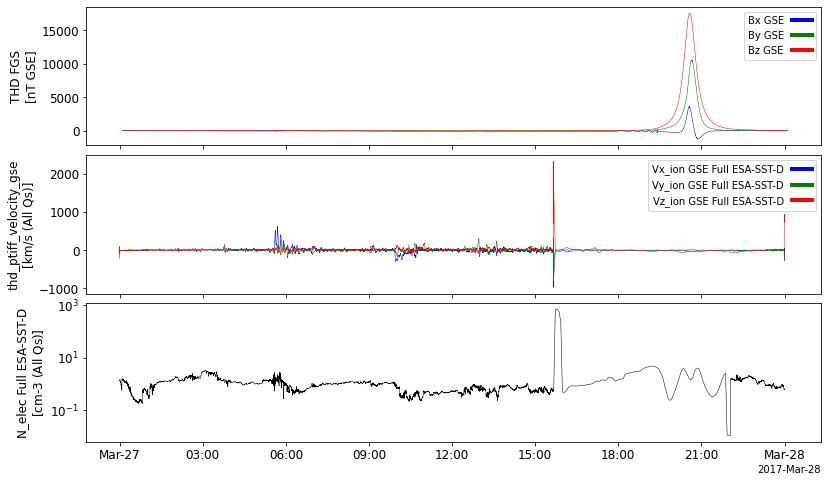

In [ ]:
tplot(['thd_fgs_gse', 'thd_ptiff_velocity_gse', 'thd_pteff_density'], ysize=8)

## Van Allen Probes (formerly RBSP)

NASA's [Van Allen Probes](https://www.nasa.gov/mission_pages/rbsp/mission/index.html) mission was designed to help us understand the Sun’s influence on Earth and Near-Earth space by studying the Earth’s radiation belts on various scales of space and time.

In [ ]:
emfisis_vars = pyspedas.rbsp.emfisis(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                                     datatype='magnetometer', 
                                     level='l3', 
                                     time_clip=True)
efw_vars = pyspedas.rbsp.efw(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                             level='l3',
                             time_clip=True)
see
rbspice_vars = pyspedas.rbsp.rbspice(trange=['2017-03-27/15:00', '2017-03-27/16:00'], 
                                     time_clip=True)

20-Jan-23 01:39:46: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/
20-Jan-23 01:39:47: Downloading https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf to rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf
20-Jan-23 01:39:48: Download complete: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf
20-Jan-23 01:39:48: Time clip was applied to: Mag
20-Jan-23 01:39:48: Time clip was applied to: Magnitude
20-Jan-23 01:39:48: Time clip was applied to: delta
20-Jan-23 01:39:48: Time clip was applied to: lambda
20-Jan-23 01:39:48: Time clip was applied to: rms
20-Jan-23 01:39:48: Time clip was applied to: coordinates
20-Jan-23 01:39:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2017/
20-

rbspa_rbspice_l3_TOFxEH_FPDU does not contain coordinates for spectrogram plotting.  Continuing...


20-Jan-23 01:40:10: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_UTC
20-Jan-23 01:40:10: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_SCLOCK_Full
20-Jan-23 01:40:10: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_OrbitNumber
20-Jan-23 01:40:11: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_ET
20-Jan-23 01:40:11: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_MidET
20-Jan-23 01:40:11: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_StopET
20-Jan-23 01:40:11: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_Duration
20-Jan-23 01:40:11: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_Spin
20-Jan-23 01:40:11: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_Sector
20-Jan-23 01:40:12: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_L
20-Jan-23 01:40:12: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_Position_SM
20-Jan-23 01:40:12: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_FPDU
20-Jan-23 01:40:12: Time clip was applied to: rbspa_rbspice_l3_TOFxEH_FPDU_E

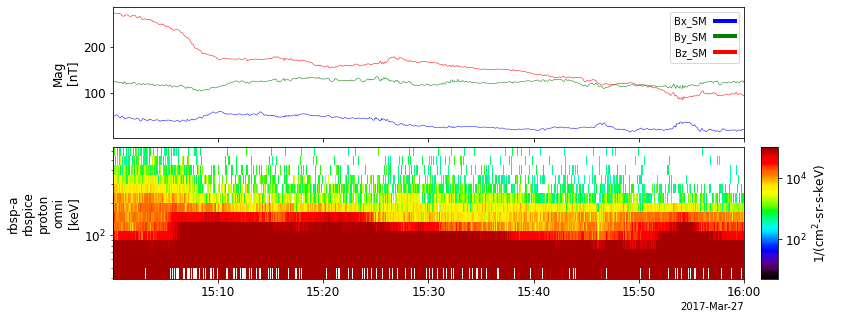

In [ ]:
tplot(['Mag', 'rbspa_rbspice_l3_TOFxEH_proton_omni'])

## Arase

The [Arase](https://global.jaxa.jp/projects/sas/erg/) mission aims at elucidating how highly charged electrons have been born while they generate and vanish repeatedly along with space storms caused by the disturbance of solar wind caused by space storms, and how space storms are developed.



In [ ]:
pyspedas.erg.orb(trange=trange)
pyspedas.erg.mgf(trange=trange)
pyspedas.erg.mepe(trange=trange)
pyspedas.erg.lepe(trange=trange)

20-Jan-23 01:40:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
20-Jan-23 01:40:24: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf to erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
20-Jan-23 01:40:25: Download complete: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
20-Jan-23 01:40:25: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


20-Jan-23 01:40:27: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf to erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
20-Jan-23 01:40:28: Download complete: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
20-Jan-23 01:40:28: /usr/local/lib/python3.8/dist-packages/pytplot/importers/cdf_to_tplot.py:264: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

20-Jan-23 01:40:28: /usr/local/lib/python3.8/dist-packages/pytplot/importers/cdf_to_tplot.py:270: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

20-Jan-23 01:40:28: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


20-Jan-23 01:40:29: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf to erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
20-Jan-23 01:40:31: Download complete: erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
20-Jan-23 01:40:31: /usr/local/lib/python3.8/dist-packages/pytplot/importers/cdf_to_tplot.py:264: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

20-Jan-23 01:40:31: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data

PI:  Satoshi Kasahara
Affiliation: The University of Tokyo

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


20-Jan-23 01:40:32: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf to erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf
20-Jan-23 01:40:33: Download complete: erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v03_01.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data

Information about ERG LEPe

PI:  Shiang-Yu Wang
Affiliation: Academia Sinica, Taiwan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_lepe_l2_omniflux_FEDO']

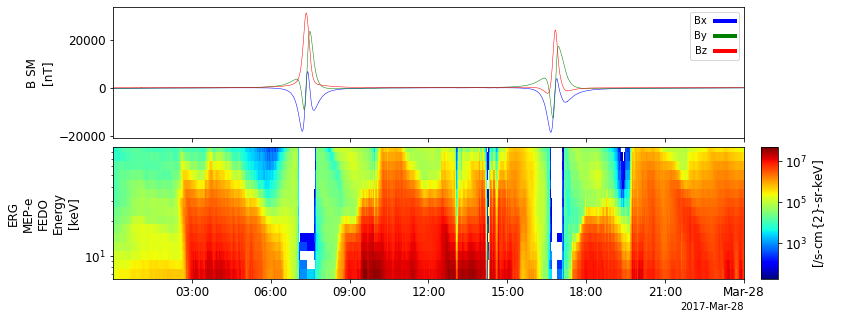

In [ ]:
tplot(['erg_mgf_l2_mag_8sec_sm', 
       'erg_mepe_l2_omniflux_FEDO'])

## Geopack (Tsyganenko field models)

In [ ]:
from pyspedas.geopack import tt89

Load IGRF coefficients ...


In [ ]:
# convert the Arase position data to km (from Re)
from pyspedas import tkm2re
tkm2re('erg_orb_l2_pos_gsm', km=True)

tt89('mms1_mec_r_gsm')
tt89('thd_pos_gsm')
tt89('erg_orb_l2_pos_gsm_km')

'erg_orb_l2_pos_gsm_km_bt89'

In [ ]:
tplot(['mms1_fgm_b_gsm_srvy_l2_bvec', # MMS measured field
       'mms1_mec_r_gsm_bt89', # T89 at the MMS1 position
       'thd_fgs_gsm', # THEMIS measured field
       'thd_pos_gsm_bt89', # T89 at the THEMIS-c position
       'erg_mgf_l2_mag_8sec_gsm', # ERG measured field
       'erg_orb_l2_pos_gsm_km_bt89'], ysize=15) # T89 at the ERG position

## Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)

The identical [TWINS-A and TWINS-B observatories](http://science.nasa.gov/missions/twins/) provide a new capability for stereoscopically imaging the magnetosphere

In [ ]:
lad_vars = pyspedas.twins.lad(trange=trange)
eph_vars = pyspedas.twins.ephemeris(trange=trange)

20-Jan-23 01:40:45: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/
20-Jan-23 01:40:46: Downloading https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf to twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
20-Jan-23 01:40:46: Download complete: twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
20-Jan-23 01:40:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/
20-Jan-23 01:40:48: Downloading https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf to twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf
20-Jan-23 01:40:49: Download complete: twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf


In [ ]:
tplot(['lad1_data', 'lad2_data', 'FSCGSM'], ysize=9)

## Polar Operational Environmental Satellites (POES)

In [ ]:
sem_vars = pyspedas.poes.sem(trange=['2017-03-27', '2017-03-28'])

20-Jan-23 01:40:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/
20-Jan-23 01:40:50: Downloading https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf to poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf
20-Jan-23 01:40:51: Download complete: poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf


In [ ]:
options('ted_pro_tel0_low_eflux', 'ylog', False)
options('ted_pro_tel30_low_eflux', 'ylog', False)

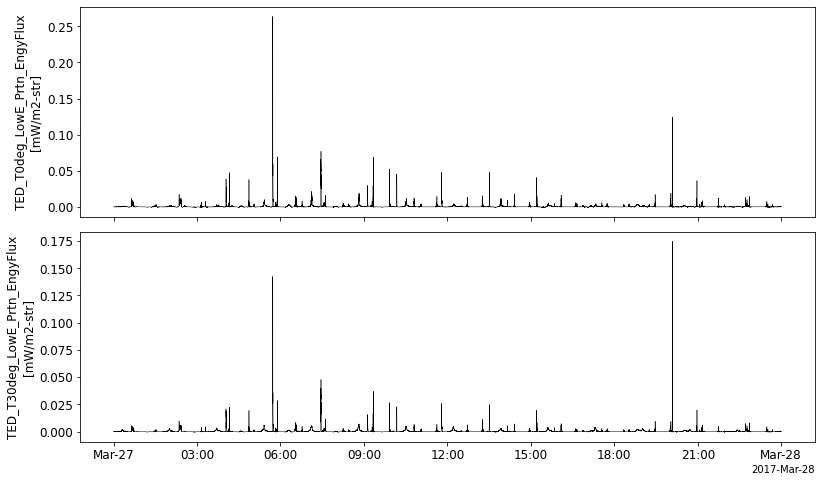

In [ ]:
from pytplot import tplot
tplot('ted_pro_tel*_low_eflux', ysize=8)

## Swarm

In [ ]:
swarm_vars = pyspedas.swarm.mag(trange=['2017-03-27/06:00', '2017-03-27/08:00'])

In [ ]:
tplot('swarma_B_VFM', var_label=['swarma_Longitude', 'swarma_Latitude'], ysize=9)

## Spherical Elementary Currents (SECS)

In [ ]:
!pip install basemap

In [ ]:
from pyspedas.secs.makeplots import make_plots

# set your content directory for SECS/EICS data
from pyspedas.secs.config import CONFIG
CONFIG['plots_dir'] = '/content/'

20-Jan-23 01:41:03: <frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject



In [ ]:
pyspedas.secs.data(trange=trange, 
                   resolution=10,
                   dtype='SECS', 
                   no_download=False, 
                   downloadonly=False, 
                   out_type='df')

20-Jan-23 01:41:04: Downloading http://vmo.igpp.ucla.edu/data1/SECS/SECS/2017/03/SECS20170327.zip to /content/SECS/2017/03/SECS20170327.zip
20-Jan-23 01:41:20: Download complete: /content/SECS/2017/03/SECS20170327.zip
20-Jan-23 01:41:20: Start unzipping: /content/SECS/2017/03/SECS20170327.zip  ------
20-Jan-23 01:41:41: running time of output df: --- 16.696034908294678 seconds ---


latitude  longitude         J         datetime
0           58.30     189.70 -5564.820  20170327_000000
1           58.30     193.15 -5919.239  20170327_000000
2           58.30     196.60 -4668.270  20170327_000000
3           58.30     200.05 -2681.050  20170327_000000
4           58.30     203.50 -6654.440  20170327_000000
...           ...        ...       ...              ...
8743675     78.60     262.15  1427.663  20170327_235950
8743676     80.05     251.80  2885.517  20170327_235950
8743677     80.05     255.25  2442.346  20170327_235950
8743678     80.05     258.70  2059.269  20170327_235950
8743679     80.05     262.15  1728.893  20170327_235950

[8743680 rows x 4 columns]

20-Jan-23 01:41:41: running time of output df: --- 0.004958391189575195 seconds ---
20-Jan-23 01:41:47: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
20-Jan-23 01:41:47: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
20-Jan-23 01:41:48: /usr/local/lib/python3.8/dist-packages/pyspedas/secs/makeplots.py:591: UserWarning: The following kwargs were not used by contour: 'tri'
  ctrf = m.contourf(lon, lat, J, contour_density, latlon=True, tri=True, cmap=plt.get_cmap('seismic', 20),

20-Jan-23 01:41:48: findfont: Font family 'times new roman' not found.
20-Jan-23 01:41:48: findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
20-Jan-23 01:41:50: findfont: Font family 'times new roman' not found.


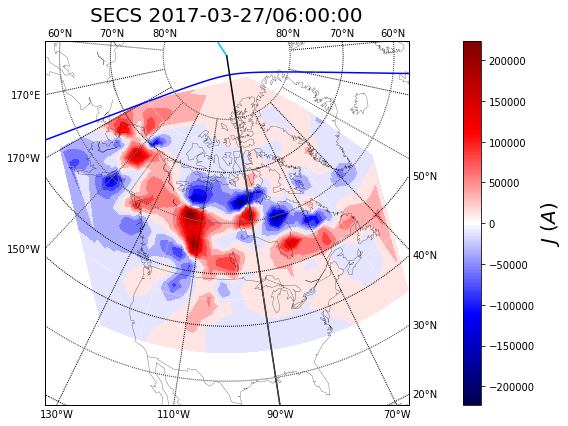

SECS plots completed!


In [ ]:
make_plots(dtype='SECS', 
           dtime='2017-03-27/06:00:00', 
           vplot_sized=True, 
           contour_den=201, 
           s_loc=False, 
           quiver_scale=30)

## Equivalent Ionospheric Currents (EICS)


In [ ]:
pyspedas.secs.data(trange=trange, 
                   resolution=10,
                   dtype='EICS', 
                   no_download=False, 
                   downloadonly=False, 
                   out_type='df')

20-Jan-23 01:41:51: Downloading http://vmo.igpp.ucla.edu/data1/SECS/EICS/2017/03/EICS20170327.zip to /content/EICS/2017/03/EICS20170327.zip
20-Jan-23 01:42:01: Download complete: /content/EICS/2017/03/EICS20170327.zip
20-Jan-23 01:42:01: Start unzipping: /content/EICS/2017/03/EICS20170327.zip  ------
20-Jan-23 01:42:16: running time of output df: --- 12.978645086288452 seconds ---


latitude  longitude       Jx       Jy         datetime
0          59.025   -161.675   -4.777  112.580  20170327_000000
1          59.025   -154.775    5.192  105.270  20170327_000000
2          59.025   -147.875  -77.049  118.370  20170327_000000
3          59.025   -140.975  -80.707  130.674  20170327_000000
4          59.025   -134.075  -14.534  123.846  20170327_000000
...           ...        ...      ...      ...              ...
1581115    82.225    -71.975  113.613  -40.179  20170327_235950
1581116    82.225    -65.075  108.611  -26.874  20170327_235950
1581117    82.225    -58.175   89.797  -10.323  20170327_235950
1581118    76.425    -99.575   37.753  -30.533  20170327_235950
1581119    76.425    -92.675   48.424  -40.218  20170327_235950

[1581120 rows x 5 columns]

20-Jan-23 01:42:16: running time of output df: --- 0.004143238067626953 seconds ---
20-Jan-23 01:42:23: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
20-Jan-23 01:42:23: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lon before:  0     -161.675
1     -154.775
2     -147.875
3     -140.975
4     -134.075
        ...   
178    -71.975
179    -65.075
180    -58.175
181    -99.575
182    -92.675
Name: longitude, Length: 183, dtype: float64
lon after:   [-161.675 -154.775 -147.875 -140.975 -134.075 -127.175 -120.275 -113.375
 -106.475  -99.575  -92.675  -85.775  -78.875  -71.975  -65.075  -58.175
  -51.275  -44.375 -161.675 -154.775 -147.875 -140.975 -134.075 -127.175
 -120.275 -113.375 -106.475  -99.575  -92.675  -85.775  -78.875  -71.975
  -65.075  -58.175  -51.275  -44.375 -161.675 -154.775 -147.875 -140.975
 -134.075 -127.175 -120.275 -113.375 -106.475  -99.575  -92.675  -85.775
  -78.875  -71.975  -65.075  -58.175  -51.275  -44.375 -161.675 -154.775
 -147.875 -140.975 -134.075 -127.175 -120.275 -113.375 -106.475  -99.575
  -92.675  -85.775  -78.875  -71.975  -65.075  -58.175  -51.275  -44.375
 -161.675 -154.775 -147.875 -140.975 -134.075 -127.175 -120.275 -113.375
 -106.475  -99.575  -92.675  -85.7

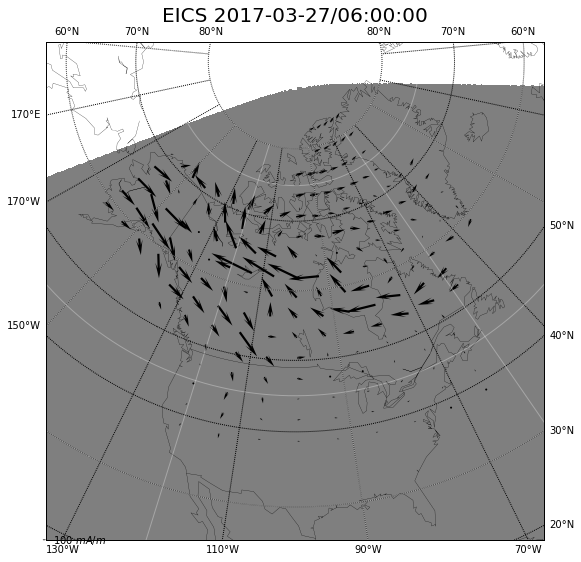

20-Jan-23 01:42:32: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
20-Jan-23 01:42:33: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
20-Jan-23 01:42:33: /usr/local/lib/python3.8/dist-packages/pyspedas/secs/makeplots.py:351: UserWarning: The following kwargs were not used by contour: 'tri'
  ctrf = m.contourf(lon, lat, Jy, contour_density, latlon=True, tri=True, cmap='jet_r', norm=norm_cb)

20-Jan-23 01:42:33: findfont: Font family 'times new roman' not found.
20-Jan-23 01:42:35: findfont: Font family 'times new roman' not found.


20-Jan-23 01:42:41: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
20-Jan-23 01:42:41: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


EICS plots completed!


In [ ]:
make_plots(dtype='EICS', 
           dtime='2017-03-27/06:00:00', 
           vplot_sized=True, 
           contour_den=201, 
           s_loc=False, 
           quiver_scale=30)

## All Sky Imager data

In [ ]:
ask_vars = pyspedas.themis.ask(trange=trange)

20-Jan-23 01:42:45: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf to themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf
20-Jan-23 01:42:51: Download complete: themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf


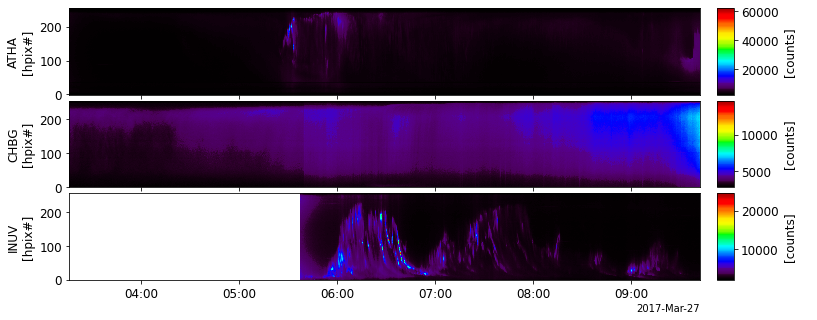

In [ ]:
tplot(['thg_ask_atha', 'thg_ask_chbg', 'thg_ask_inuv'])

## Ground magnetometer data

In [ ]:
pyspedas.themis.gmag(trange=trange)

20-Jan-23 01:42:57: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/
20-Jan-23 01:42:59: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf to themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
20-Jan-23 01:42:59: Download complete: themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
20-Jan-23 01:42:59: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2017/
20-Jan-23 01:43:00: Downloading http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf to themis_data/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf
20-Jan-23 01:43:01: Download complete: themis_data/thg/l2/mag/chbg/2017/thg_l2_mag_chbg_20170327_v01.cdf
20-Jan-23 01:43:01: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/ekat/2017/
20-Jan-23 01:43:01: Remote index not found: http://themis.ssl

['thg_mag_and',
 'thg_mag_atu',
 'thg_mag_bfe',
 'thg_mag_bjn',
 'thg_mag_dmh',
 'thg_mag_dob',
 'thg_mag_don',
 'thg_mag_fhb',
 'thg_mag_gdh',
 'thg_mag_ghb',
 'thg_mag_hop',
 'thg_mag_hov',
 'thg_mag_jan',
 'thg_mag_jck',
 'thg_mag_kar',
 'thg_mag_kuv',
 'thg_mag_lyr',
 'thg_mag_nal',
 'thg_mag_naq',
 'thg_mag_nor',
 'thg_mag_roe',
 'thg_mag_rvk',
 'thg_mag_skt',
 'thg_mag_sol',
 'thg_mag_sor',
 'thg_mag_stf',
 'thg_mag_sum',
 'thg_mag_svs',
 'thg_mag_tdc',
 'thg_mag_thl',
 'thg_mag_tro',
 'thg_mag_amd',
 'thg_mag_atha',
 'thg_mag_bbg',
 'thg_mag_blc',
 'thg_mag_bou',
 'thg_mag_brn',
 'thg_mag_brw',
 'thg_mag_bsl',
 'thg_mag_cbb',
 'thg_mag_ccnv',
 'thg_mag_cdrt',
 'thg_mag_chbg',
 'thg_mag_cigo',
 'thg_mag_cmo',
 'thg_mag_crvr',
 'thg_mag_ded',
 'thg_mag_dik',
 'thg_mag_frd',
 'thg_mag_frn',
 'thg_mag_fsim',
 'thg_mag_fsmi',
 'thg_mag_fykn',
 'thg_mag_gbay',
 'thg_mag_gill',
 'thg_mag_gjoa',
 'thg_mag_gua',
 'thg_mag_han',
 'thg_mag_hon',
 'thg_mag_hris',
 'thg_mag_iglo',
 'thg_mag_

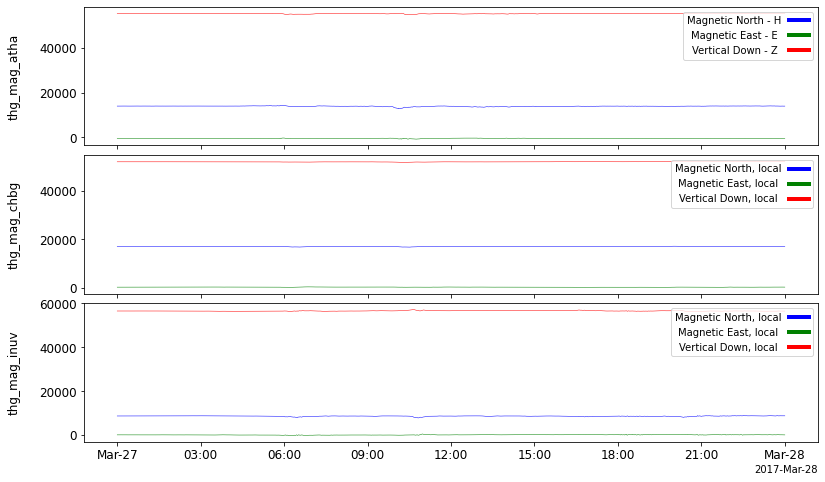

In [ ]:
tplot(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'], ysize=8)

Subtract the median from the ground mag data

In [ ]:
from pyspedas import subtract_median

subtract_median(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'])

20-Jan-23 01:46:44: thg_mag_atha copied to thg_mag_atha-m
20-Jan-23 01:46:44: Subtract Median was applied to: thg_mag_atha-m
20-Jan-23 01:46:44: thg_mag_chbg copied to thg_mag_chbg-m
20-Jan-23 01:46:44: Subtract Median was applied to: thg_mag_chbg-m
20-Jan-23 01:46:44: thg_mag_inuv copied to thg_mag_inuv-m
20-Jan-23 01:46:44: Subtract Median was applied to: thg_mag_inuv-m


In [ ]:
options('thg_mag_atha-m', 'yrange', [-400, 400])
options('thg_mag_chbg-m', 'yrange', [-400, 400])
options('thg_mag_inuv-m', 'yrange', [-400, 400])

tplot(['thg_mag_atha-m', 'thg_mag_chbg-m', 'thg_mag_inuv-m'], ysize=8)

## Magnetic Induction Coil Array (MICA)

In [ ]:
nal_vars = pyspedas.mica.induction(site='NAL', trange=trange)


20-Jan-23 01:46:45: Downloading remote index: http://mirl.unh.edu/ULF/cdf/NAL/2017/03/
20-Jan-23 01:46:45: Downloading http://mirl.unh.edu/ULF/cdf/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf to mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf
20-Jan-23 01:46:46: Download complete: mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf


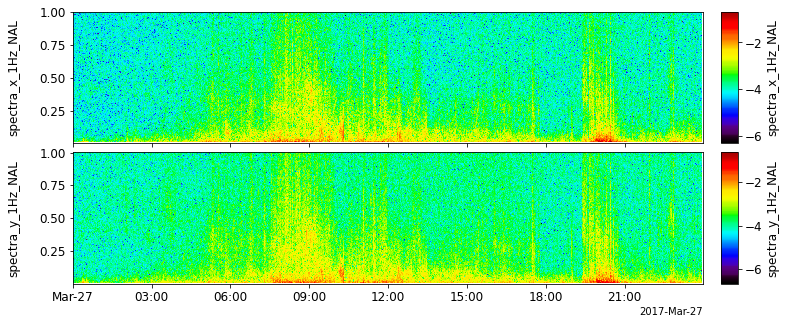

In [ ]:
tplot('spectra_?_1Hz_NAL')

## Resources

### PyTplot Basics
- [Introduction to PyTplot](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Introduction_to_PyTplot.ipynb)

### Loading Data
- [MMS examples](https://github.com/spedas/mms-examples/tree/master/basic)
- [THEMIS examples](https://github.com/spedas/themis-examples/tree/main/basic)
- [Load data from HAPI servers](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PySPEDAS_loading_data_from_HAPI_servers.ipynb)

### Plotting Data
- [Annotations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_annotations.ipynb)
- [Range options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_range_options.ipynb)
- [Spectrogram options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_spectrogram_options.ipynb)
- [Legend options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_legend_options.ipynb)
- [Markers and symbols](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_markers_and_symbols.ipynb)
- [Error bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_error_bars.ipynb)
- [Pseudo variables](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_pseudo_variables.ipynb)
- [Highlight intervals and vertical bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_highlight_intervals_and_vertical_bars.ipynb)

### Dates and Times
- [Working with dates and times](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Working_with_dates_and_times_with_PySPEDAS_PyTplot.ipynb)

### Coordinate Transformations
- [Coordinate transformations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Coordinate_transformations_with_OMNI_data.ipynb)
- [Boundary normal (LMN) coordinates](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_LMN_coordinate_transformation.ipynb)
- [Quaternion transformations with SpacePy](https://github.com/spedas/mms-examples/blob/master/basic/MMS_quaternion_coordinate_transformations.ipynb)

### Analysis
- [Plasma calculations with PlasmaPy](https://github.com/spedas/mms-examples/blob/master/advanced/Plasma%20calculations%20with%20PlasmaPy.ipynb)
- [Poynting flux with MMS data](https://github.com/spedas/mms-examples/blob/master/advanced/Poynting_flux_with_MMS_data.ipynb)
- [Plasma beta with MMS data](https://github.com/spedas/mms-examples/blob/master/basic/Plasma%20Beta%20with%20FGM%20and%20FPI%20data.ipynb) (note: the PlasmaPy notebook above shows a much easier method)
- [Curlometer calculations](https://github.com/spedas/mms-examples/blob/master/basic/Curlometer%20Technique.ipynb)
- [Neutral sheet models](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_neutral_sheet_models.ipynb)
- [Wave polarization calculations](https://github.com/spedas/mms-examples/blob/master/advanced/Wave_polarization_using_SCM_data.ipynb)
- [Dynamic power spectra calculations](https://github.com/spedas/mms-examples/blob/master/basic/Search-coil%20Magnetometer%20(SCM).ipynb)
- [2D slices of MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate_2D_slices_of_FPI_and_HPCA_data.ipynb)
- [Generating spectrograms and moments from MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate%20spectrograms%20and%20moments%20with%20mms_part_getspec.ipynb)


### Documentation
- [Advanced Composition Explorer (ACE)](https://pyspedas.readthedocs.io/en/latest/ace.html)
- [Akebono](https://pyspedas.readthedocs.io/en/latest/akebono.html)
- [Arase (ERG)](https://pyspedas.readthedocs.io/en/latest/erg.html)
- [Cluster](https://pyspedas.readthedocs.io/en/latest/cluster.html)
- [Colorado Student Space Weather Experiment (CSSWE)](https://pyspedas.readthedocs.io/en/latest/csswe.html)
- [Communications/Navigation Outage Forecasting System (C/NOFS)](https://pyspedas.readthedocs.io/en/latest/cnofs.html)
- [Deep Space Climate Observatory (DSCOVR)](https://pyspedas.readthedocs.io/en/latest/dscovr.html)
- [Dynamics Explorer 2 (DE2)](https://pyspedas.readthedocs.io/en/latest/de2.html)
- [Equator-S](https://pyspedas.readthedocs.io/en/latest/equator-s.html)
- [Fast Auroral Snapshot Explorer (FAST)](https://pyspedas.readthedocs.io/en/latest/fast.html)
- [Geotail](https://pyspedas.readthedocs.io/en/latest/geotail.html)
- [Geostationary Operational Environmental Satellite (GOES)](https://pyspedas.readthedocs.io/en/latest/goes.html)
- [Imager for Magnetopause-to-Aurora Global Exploration (IMAGE)](https://pyspedas.readthedocs.io/en/latest/image.html)
- [Kyoto Dst Index](https://pyspedas.readthedocs.io/en/latest/kyoto.html)
- [LANL](https://pyspedas.readthedocs.io/en/latest/lanl.html)
- [Mars Atmosphere and Volatile Evolution (MAVEN)](https://pyspedas.readthedocs.io/en/latest/maven.html)
- [Magnetic Induction Coil Array (MICA)](https://pyspedas.readthedocs.io/en/latest/mica.html)
- [Magnetospheric Multiscale (MMS)](https://pyspedas.readthedocs.io/en/latest/mms.html)
- [OMNI](https://pyspedas.readthedocs.io/en/latest/omni.html)
- [Polar Orbiting Environmental Satellites (POES)](https://pyspedas.readthedocs.io/en/latest/poes.html)
- [Polar](https://pyspedas.readthedocs.io/en/latest/polar.html)
- [Parker Solar Probe (PSP)](https://pyspedas.readthedocs.io/en/latest/psp.html)
- [Solar & Heliospheric Observatory (SOHO)](https://pyspedas.readthedocs.io/en/latest/soho.html)
- [Solar Orbiter (SOLO)](https://pyspedas.readthedocs.io/en/latest/solo.html)
- [Solar Terrestrial Relations Observatory (STEREO)](https://pyspedas.readthedocs.io/en/latest/stereo.html)
- [Space Technology 5 (ST5)](https://pyspedas.readthedocs.io/en/latest/st5.html)
- [Spherical Elementary Currents (SECS)](https://github.com/spedas/pyspedas/blob/master/pyspedas/secs/README.md)
- [Swarm](https://github.com/spedas/pyspedas/blob/master/pyspedas/swarm/README.md)
- [Time History of Events and Macroscale Interactions during Substorms (THEMIS)](https://pyspedas.readthedocs.io/en/latest/themis.html)
- [Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)](https://pyspedas.readthedocs.io/en/latest/twins.html)
- [Ulysses](https://pyspedas.readthedocs.io/en/latest/ulysses.html)
- [Van Allen Probes (RBSP)](https://pyspedas.readthedocs.io/en/latest/rbsp.html)
- [Wind](https://pyspedas.readthedocs.io/en/latest/wind.html)